In [85]:
import pandas as pd
pd.__version__

'2.1.1'

In [86]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [87]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [88]:
print(f'Колонок: {df.shape[1]}, строк: {df.shape[0]}')

Колонок: 15, строк: 32561


In [91]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [92]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [94]:
df['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [95]:
df.groupby('sex')['age'].mean().astype(int)


sex
 Female    36
 Male      39
Name: age, dtype: int64

<Axes: xlabel='education'>

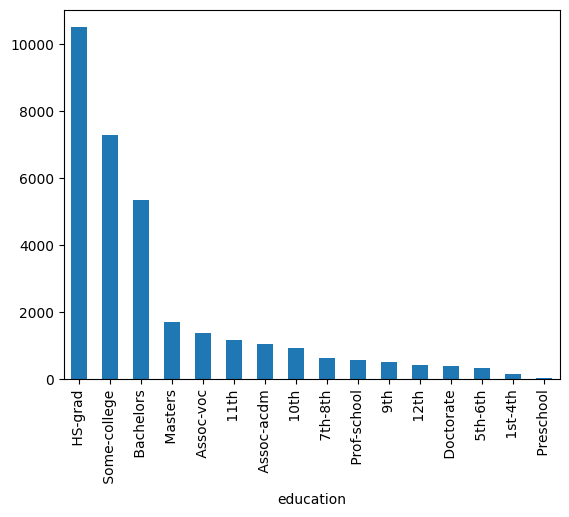

In [96]:
df['education'].value_counts().plot(kind='bar')

In [97]:
df.groupby('income')['age'].agg(['mean', 'std']).astype(int)

,mean,std
income,,
<=50K,36,14
>50K,44,10


In [98]:
truth = df[df['income'] == ' >50K']['education'].isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']).all()

if truth:
    print('Да')
else:
    print('Нет')

Нет


In [99]:
married = df[df['marital.status'].str.startswith(' Married')]['income'].value_counts(normalize=True)[' >50K']

if married > 0.5:
    print('Среди женатых')
else:
    print('Среди холостых')


Среди холостых


In [100]:
df.pivot_table(['hours.per.week'], ['native.country'], ['income'], aggfunc='mean')

hours.per.week           
income                               <=50K       >50K
native.country                                       
 Cambodia                        41.416667  40.000000
 Canada                          37.914634  45.641026
 China                           37.381818  38.900000
 Columbia                        38.684211  50.000000
 Cuba                            37.985714  42.440000
 Dominican-Republic              42.338235  47.000000
 Ecuador                         38.041667  48.750000
 El-Salvador                     36.030928  45.000000
 England                         40.483333  44.533333
 France                          41.058824  50.750000
 Germany                         39.139785  44.977273
 Greece                          41.809524  50.625000
 Guatemala                       39.360656  36.666667
 Haiti                           36.325000  42.750000
 Holand-Netherlands              40.000000        NaN
 Honduras                        34.333333  60.000000
 Hong                            39.142857  45.000000
 Hungary                         31.300000  50.000000
 India                           38.233333  46.475000
 Iran                            41.440000  47.500000
 Ireland                         40.947368  48.000000
 Italy                           39.625000  45.400000
 Jamaica                         38.239437  41.100000
 Japan                           41.000000  47.958333
 Laos                            40.375000  40.000000
 Mexico                          40.003279  46.575758
 Nicaragua                       36.093750  37.500000
 Outlying-US(Guam-USVI-etc)      41.857143        NaN
 Peru                            35.068966  40.000000
 Philippines                     38.065693  43.032787
 Poland                          38.166667  39.000000
 Portugal                        41.939394  41.500000
 Puerto-Rico                     38.470588  39.416667
 Scotland                        39.444444  46.666667
 South                           40.156250  51.437500
 Taiwan                          33.774194  46.800000
 Thailand                        42.866667  58.333333
 Trinadad&Tobago                 37.058824  40.000000
 United-States                   38.799127  45.505369
 Vietnam                         37.193548  39.200000
 Yugoslavia                      41.600000  49.500000

In [103]:
female_high_income = df[(df['sex'] == ' Female') & (df['income'] == ' >50K')]
average_income_by_country = female_high_income.groupby('native.country')['income'].count().sort_values(ascending=False)
country_with_highest_income = average_income_by_country.idxmax()

print(average_income_by_country.head())
print(f'Женщины из{country_with_highest_income} получают в среднем большую зарплату (>50K) чаще')


native.country
 United-States    1072
 Philippines        12
 Canada              9
 Germany             7
 England             6
Name: income, dtype: int64
Женщины из United-States получают в среднем большую зарплату (>50K) чаще


In [104]:
import numpy as np
df['magic_salary'] = np.where(df['income'] == ' >50K', np.random.randint(51, 200, size=len(df)), np.random.randint(0, 50, size=len(df)))
df.groupby('education')['magic_salary'].mean()

education
 10th            30.679528
 11th            28.898723
 12th            32.681293
 1st-4th         26.494048
 5th-6th         28.669670
 7th-8th         30.829721
 9th             29.159533
 Assoc-acdm      49.612933
 Assoc-voc       49.758321
 Bachelors       65.673576
 Doctorate       98.234867
 HS-grad         40.427102
 Masters         80.153221
 Preschool       25.333333
 Prof-school     99.828125
 Some-college    43.473186
Name: magic_salary, dtype: float64